In [8]:
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0  
                  )
data.head()
data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
data["BackDistance"]
type(data)
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape
(y == 0).sum()

BackDistance    348
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
 
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest.values.ravel())
score_r = rfc.score(Xtest,Ytest.values.ravel())
 
print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r)
     )
Ytest.values.ravel()

Single Tree:0.9666666666666667 Random Forest:0.9533333333333334


D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

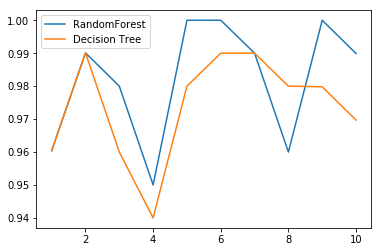

'\nlabel = "RandomForest"\nfor model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:\n    score = cross_val_score(model,wine.data,wine.target,cv=10)\n    print("{}:".format(label)),print(score.mean())\n    plt.plot(range(1,11),score,label = label)\n    plt.legend()\n    label = "DecisionTree"\n \n'

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
 
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,y,cv=10)
 
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X,y,cv=10)
 
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()
 
#====================more nice code===================#
 
"""
label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label = label)
    plt.legend()
    label = "DecisionTree"
 
"""

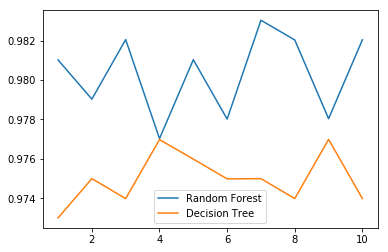

In [6]:
rfc_l = []
clf_l = []
 
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X,y,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X,y,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

In [ ]:
#####【TIME WARNING: 2mins 30 seconds】#####
 
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,X,y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
 
rfc.estimators_[0].random_state
 
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)


In [34]:

 
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(X,y)
 

rfc.oob_score_#0.9719101123595506


0.98

In [36]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
 
rfc.feature_importances_
#rfc.apply(Xtest)#apply
#rfc.predict(Xtest)#predict
#rfc.predict_proba(Xtest)

array([0.90136744, 0.042255  , 0.05637755])

In [102]:
#cross-validation and tuning parameters
rfc = RandomForestClassifier(n_estimators = 33 ##tuning1
                            # ,random_state=25  ##tuning2
                           # ,max_depth = 3    ##tuning3
                           # ,max_features = "sqrt"
                            ,criterion = 'entropy'
                            )
rfc = rfc.fit(Xtrain, Ytrain)
score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
score

0.9857545271629778

In [107]:
#min_samples_split
import numpy as np
param_grid={'min_samples_split':np.arange(2, 20, 1)}
 
rfc = RandomForestClassifier(random_state=90
                             ,n_estimators = 33
                             ,criterion = 'entropy'
                             ,max_depth = 8
                             ,n_jobs = -1
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(Xtrain,Ytrain)
 
 
GS.best_score_,GS.best_params_

(0.9914285714285714, {'min_samples_split': 2})

In [71]:
GS.best_params_

{'n_estimators': 33}

In [134]:
#validation and performance metrics
rfc = RandomForestClassifier(random_state=90
                             ,n_estimators = 33
                             ,criterion = 'entropy'
                             ,max_depth = 4
                             
                             ,n_jobs = -1
                            )
rfc = rfc.fit(Xtrain, Ytrain)
y_predict = rfc.predict(Xtest)
target_names = ['class 0', 'class 1']
acc = accuracy_score(Ytest, y_predict)
print(classification_report(Ytest, y_predict, target_names=target_names, digits=4))
print('ACC:',acc)

              precision    recall  f1-score   support

     class 0     0.9479    0.9381    0.9430        97
     class 1     0.9706    0.9754    0.9730       203

   micro avg     0.9633    0.9633    0.9633       300
   macro avg     0.9593    0.9568    0.9580       300
weighted avg     0.9633    0.9633    0.9633       300

ACC: 0.9633333333333334


## Regression of RF

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0 
                  )
data.head()
#data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
data["BackDistance"]
data.head()
#type(data)
#data = data.sort_values('V').reset_index(drop = True)
#.drop('Id')
data.head()

,V,T,HRR,BackDistance
Id,,,,
1,2.7486,16.8125,5578.8956,8.519
2,1.1585,12.8702,9768.1077,22.687
3,1.0696,23.5542,11833.7440,23.588
4,2.3904,14.4162,7735.6189,9.991
5,0.5358,14.7729,11367.2940,28.385


In [111]:
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape

((1000, 3), (1000, 1))

In [113]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, X, y, cv=10
               #,scoring = "neg_mean_squared_error"
               ).mean()

0.9867823951305027

In [16]:
#sklearn
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## Tunning paramrters

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
data = load_breast_cancer()
 
data
 
data.data.shape
 
data.target
 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [50]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
 
score_pre



0.9666925935528475

0.9684480598046841 41


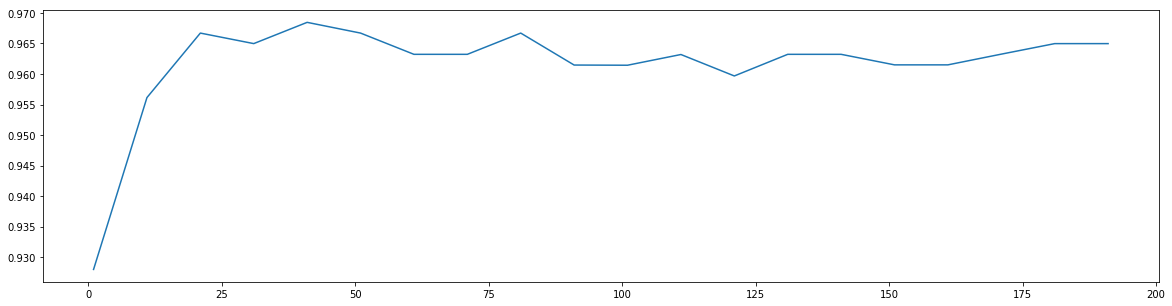

In [51]:
#####【TIME WARNING: 30 seconds】#####
 
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
 
#list.index([object])


0.9719568317345088 39


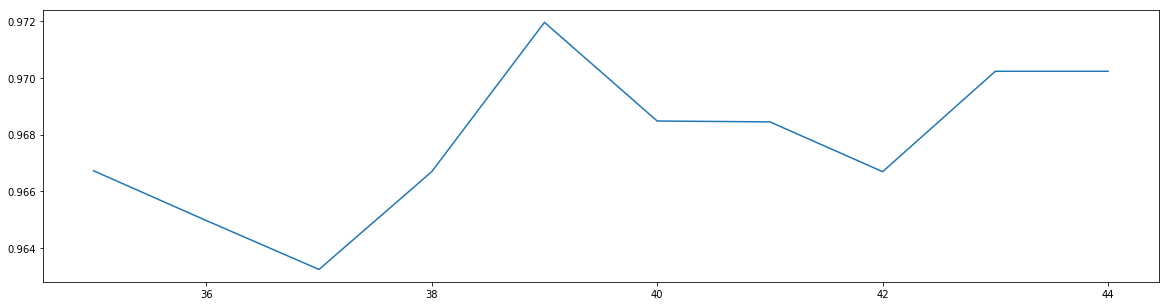

In [52]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [54]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_

f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [55]:

param_grid = {'max_features':np.arange(5,30,1)} 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_

f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [56]:

 
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_


f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [57]:
 
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_


f:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9718804920913884

In [58]:
 
param_grid = {'criterion':['gini', 'entropy']}
 
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
GS.best_params_
 
GS.best_score_


0.9718804920913884

In [59]:
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score
 
score - score_pre


0.005264238181661218